# data prep

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("data/student.csv")

# delete broken data
df = df.dropna(how='any',axis=0)
df = df.drop(["school", "G1", "G2"], axis=1)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,10
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,15
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,R,GT3,T,2,3,services,other,course,...,yes,no,5,4,2,1,2,5,4,10
1040,F,18,U,LE3,T,3,1,teacher,services,course,...,yes,no,4,3,4,1,1,1,4,16
1041,F,18,U,GT3,T,1,1,other,other,course,...,no,no,1,1,1,1,1,5,6,9
1042,M,17,U,LE3,T,3,1,services,services,course,...,yes,no,2,4,5,3,4,2,6,10


In [27]:
for i, _ in enumerate(df.dtypes):
    print(df.columns.values[i], _)

sex object
age int64
address object
famsize object
Pstatus object
Medu int64
Fedu int64
Mjob object
Fjob object
reason object
guardian object
traveltime int64
studytime int64
failures int64
schoolsup object
famsup object
paid object
activities object
nursery object
higher object
internet object
romantic object
famrel int64
freetime int64
goout int64
Dalc int64
Walc int64
health int64
absences int64
G3 int64


In [28]:
df.dtypes[0].name

C:\Users\slotl\AppData\Local\Temp\ipykernel_1904\318346912.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.dtypes[0].name


'object'

In [29]:
# replace categorical data with discrete whole numbers
column_keys = df.columns.values
categorical_column_keys = []
categorical_unique_values = {}

for i, dt in enumerate(df.dtypes):
    if dt.name == "object":
        categorical_column_keys.append(df.columns.values[i])

for i in categorical_column_keys:
    unique = df[i].unique()
    categorical_unique_values[i] = unique
    df[i].replace(unique, np.arange(0, len(df[i].unique()), 1, dtype=int), inplace=True)

categorical_unique_values

C:\Users\slotl\AppData\Local\Temp\ipykernel_1904\3194827555.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(unique, np.arange(0, len(df[i].unique()), 1, dtype=int), inplace=True)
C:\Users\slotl\AppData\Local\Temp\ipykernel_1904\3194827555.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

{'sex': array(['F', 'M'], dtype=object),
 'address': array(['U', 'R'], dtype=object),
 'famsize': array(['GT3', 'LE3'], dtype=object),
 'Pstatus': array(['A', 'T'], dtype=object),
 'Mjob': array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 'Fjob': array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object),
 'reason': array(['course', 'other', 'home', 'reputation'], dtype=object),
 'guardian': array(['mother', 'father', 'other'], dtype=object),
 'schoolsup': array(['yes', 'no'], dtype=object),
 'famsup': array(['no', 'yes'], dtype=object),
 'paid': array(['no', 'yes'], dtype=object),
 'activities': array(['no', 'yes'], dtype=object),
 'nursery': array(['yes', 'no'], dtype=object),
 'higher': array(['yes', 'no'], dtype=object),
 'internet': array(['no', 'yes'], dtype=object),
 'romantic': array(['no', 'yes'], dtype=object)}

In [30]:
OUTPUT_KEYS = ["G3"]

X = df.drop(OUTPUT_KEYS, axis=1).values
y = df[OUTPUT_KEYS].values

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="default")
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled = train_test_split(X, y, X_scaled, test_size=0.2, random_state=1)
X_train

array([[ 1, 17,  0, ...,  3,  4,  6],
       [ 1, 18,  1, ...,  4,  3,  0],
       [ 0, 18,  0, ...,  1,  3,  0],
       ...,
       [ 0, 18,  0, ...,  1,  4,  2],
       [ 0, 17,  1, ...,  1,  1,  0],
       [ 1, 16,  0, ...,  3,  2, 10]])

# training approach 1: neural networks
- for non-linear relationships between grades and student profile

In [32]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=len(OUTPUT_KEYS), activation="relu"),
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 135.2370 - mean_absolute_error: 10.9470
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.1586 - mean_absolute_error: 9.2531  
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.5579 - mean_absolute_error: 4.9930 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5748 - mean_absolute_error: 3.1101 
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5479 - mean_absolute_error: 2.7517 
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0839 - mean_absolute_error: 2.5217
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1243 - mean_absolute_error: 2.5320 
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6786 - mean_absolute_error: 2.5110
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5390 - mean_absolute_error: 2.4032
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3515 - mean_absolute_error: 2.5145
Epoch 11/100
27/27 ━━

main metric: mean absolute error, to see how far, on average, is the model away from the actual points

In [34]:
model.evaluate(X_test_scaled, y_test, return_dict=True)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.5727 - mean_absolute_error: 2.9632  


{'loss': 15.79400634765625, 'mean_absolute_error': 2.867816925048828}

# inspection

In [38]:
y_test_pred = model.predict(X_test_scaled)
y_test_pred

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[ 8.723311 ],
       [10.821233 ],
       [14.124775 ],
       [13.467138 ],
       [ 9.51948  ],
       [12.103113 ],
       [12.0845375],
       [12.299608 ],
       [16.054367 ],
       [11.814116 ],
       [12.592188 ],
       [ 8.981345 ],
       [ 8.58253  ],
       [11.922014 ],
       [10.907885 ],
       [10.128849 ],
       [10.84746  ],
       [ 6.6299996],
       [12.460818 ],
       [10.671669 ],
       [12.659994 ],
       [14.881489 ],
       [ 2.7226954],
       [17.069626 ],
       [14.024135 ],
       [ 9.741843 ],
       [13.916859 ],
       [14.284369 ],
       [ 7.874807 ],
       [17.561995 ],
       [13.90849  ],
       [ 6.8946   ],
       [10.498482 ],
       [11.493574 ],
       [11.890976 ],
       [13.371013 ],
       [11.566416 ],
       [ 0.       ],
       [12.584158 ],
       [ 2.183096 ],
       [14.901405 ],
       [10.303901 ],
       [ 7.4209824],
       [ 9.845926 ],
       [11.901767 ],
       [ 4.925878 ],
       [14.350122 ],
       [13.08

In [39]:
def view_profile(INDEX: int, y_pred) -> None:
    print("INPUT")
    for i, val in enumerate(X_test[INDEX]):
        key = column_keys[i]
        is_categorical = key in categorical_column_keys
        print(f"{key}: {categorical_unique_values[key][val] if is_categorical else val}")

    print("\nOUTPUT")
    for i, val in enumerate(y_pred[INDEX]):
        print(f"{OUTPUT_KEYS[i]} - pred: {y_pred[INDEX][i]} | real: {y_test[INDEX][i]}")

view_profile(5, y_test_pred)

INPUT
sex: M
age: 18
address: U
famsize: GT3
Pstatus: T
Medu: 2
Fedu: 2
Mjob: services
Fjob: other
reason: home
guardian: mother
traveltime: 1
studytime: 2
failures: 0
schoolsup: no
famsup: yes
paid: no
activities: yes
nursery: yes
higher: yes
internet: yes
romantic: no
famrel: 4
freetime: 4
goout: 4
Dalc: 2
Walc: 4
health: 5
absences: 10

OUTPUT
G3 - pred: 12.103113174438477 | real: 11


# training approach 1.1: neural networks with regularization

In [40]:
lambda_ = 0.001

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(lambda_)),
    tf.keras.layers.Dense(units=32, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(lambda_)),
    tf.keras.layers.Dense(units=16, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(lambda_)),
    tf.keras.layers.Dense(units=len(OUTPUT_KEYS), activation="relu"),
])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 121.4760 - mean_absolute_error: 10.3294
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.0719 - mean_absolute_error: 7.0370
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.6260 - mean_absolute_error: 3.4526 
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6120 - mean_absolute_error: 2.8983
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.2926 - mean_absolute_error: 2.8086
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6175 - mean_absolute_error: 2.6192 
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.7513 - mean_absolute_error: 2.5695
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7265 - mean_absolute_error: 2.4291
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4856 - mean_absolute_error: 2.4792
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0823 - mean_absolute_error: 2.4406
Epoch 11/100
27/27 ━━━━━━

In [41]:
model.evaluate(X_test_scaled, y_test, return_dict=True)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3693 - mean_absolute_error: 2.9774  


{'loss': 16.375350952148438, 'mean_absolute_error': 2.8847405910491943}

doesn't improve much

# training approach 2: simple regression model

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[11.68824674],
       [ 4.31667521],
       [12.90042249],
       [12.33850483],
       [10.73940779],
       [12.11968825],
       [ 9.24529133],
       [13.6685284 ],
       [11.45252795],
       [11.54370723],
       [10.62137355],
       [ 9.35612457],
       [11.45619536],
       [12.79628304],
       [11.95006801],
       [ 9.79223643],
       [13.1952825 ],
       [12.27550305],
       [12.15885436],
       [10.44520886],
       [12.25849358],
       [11.85704277],
       [ 9.41359287],
       [13.36784453],
       [ 9.79557792],
       [ 8.30859093],
       [ 9.99295921],
       [12.59509029],
       [12.55556084],
       [13.68645216],
       [11.07883085],
       [11.02006388],
       [13.20582591],
       [ 9.08828659],
       [ 9.31169301],
       [10.70425571],
       [12.87326483],
       [11.40740762],
       [12.95507886],
       [10.66183945],
       [13.66921017],
       [12.56480796],
       [11.90215289],
       [10.46693057],
       [10.92321734],
       [ 8

In [50]:
# eval
print("mean absolute error:", np.average(np.absolute(y_pred-y_test)))

mean absolute error: 2.3375930090730543


In [51]:
view_profile(1, y_pred)

INPUT
sex: M
age: 17
address: U
famsize: GT3
Pstatus: T
Medu: 2
Fedu: 1
Mjob: other
Fjob: other
reason: home
guardian: mother
traveltime: 2
studytime: 1
failures: 3
schoolsup: yes
famsup: yes
paid: no
activities: yes
nursery: yes
higher: no
internet: yes
romantic: no
famrel: 4
freetime: 5
goout: 1
Dalc: 1
Walc: 1
health: 3
absences: 2

OUTPUT
G3 - pred: 4.316675214176058 | real: 10


this seems to be slightly better

# visualization
looking for some insights in the model

C:\Users\slotl\AppData\Local\Temp\ipykernel_1904\2500767159.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs.legend()


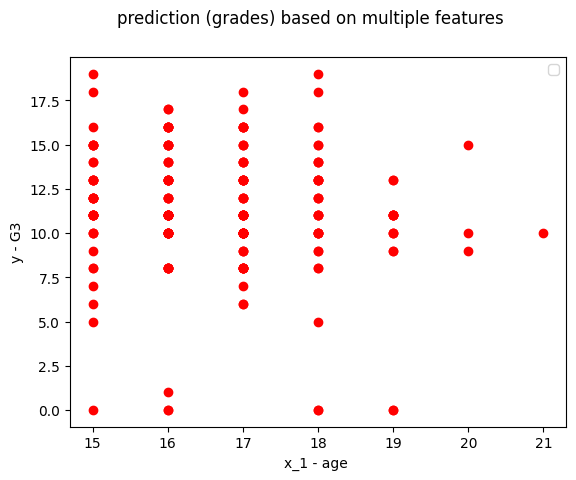

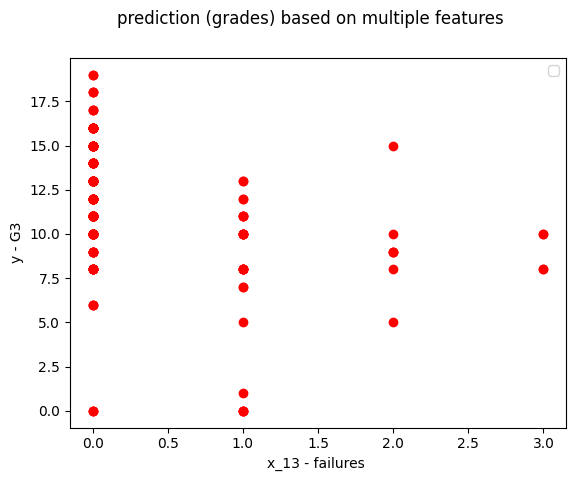

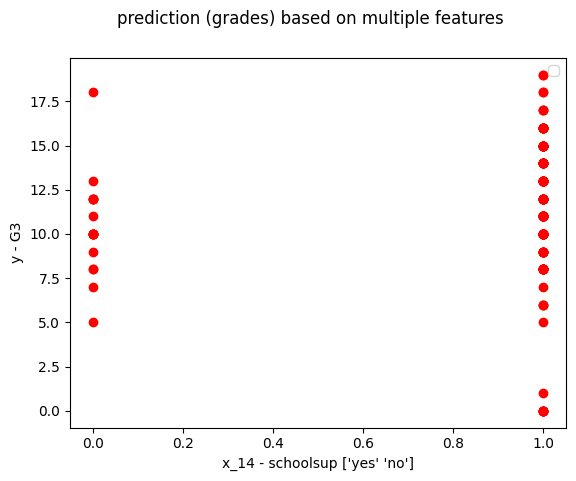

In [65]:
import matplotlib.pyplot as plt

def visualize_prediction(i1, iy=0):
    X1 = X_test[:, i1]
    y = y_test[:, iy]

    # visualization
    fig, axs = plt.subplots(1, 1)
    fig.suptitle(f'prediction (grades) based on multiple features')
    points = axs.scatter(X1, y, c="r", marker="o")
    axs.legend()
    axs.set(xlabel=f'x_{i1} - {df.columns.values[i1]} {categorical_unique_values[df.columns.values[i1]] if df.columns.values[i1] in categorical_column_keys else ""}', ylabel=f'y - {OUTPUT_KEYS[iy]}')

visualize_prediction(1)
visualize_prediction(13)
visualize_prediction(14)